<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/Concrate_ML_Pre_processing_train_test_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**_Concrate_Pre_processing_traning_testing_ML_noalgorithm**

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Nova seção

In [153]:
data = pd.read_csv('/content/concrete.csv')

In [154]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [155]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000
mean,281.168,73.896,54.188,181.567,6.205,972.919,773.580,45.662,35.818
std,104.506,86.279,63.997,21.354,5.974,77.754,80.176,63.170,16.706
min,102.000,0.000,0.000,121.800,0.000,801.000,594.000,1.000,2.330
25%,192.375,0.000,0.000,164.900,0.000,932.000,730.950,7.000,23.710
50%,272.900,22.000,0.000,185.000,6.400,968.000,779.500,28.000,34.445
75%,350.000,142.950,118.300,192.000,10.200,1029.400,824.000,56.000,46.135
max,540.000,359.400,200.100,247.000,32.200,1145.000,992.600,365.000,82.600


In [156]:
print(len(data))

1030


In [157]:
data.columns = ['cement_component', 'furnace_slag', 'flay_ash', 
'water_component', 'superplasticizer', \
 'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_strength']

In [158]:
data.head()

,cement_component,furnace_slag,flay_ash,water_component,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


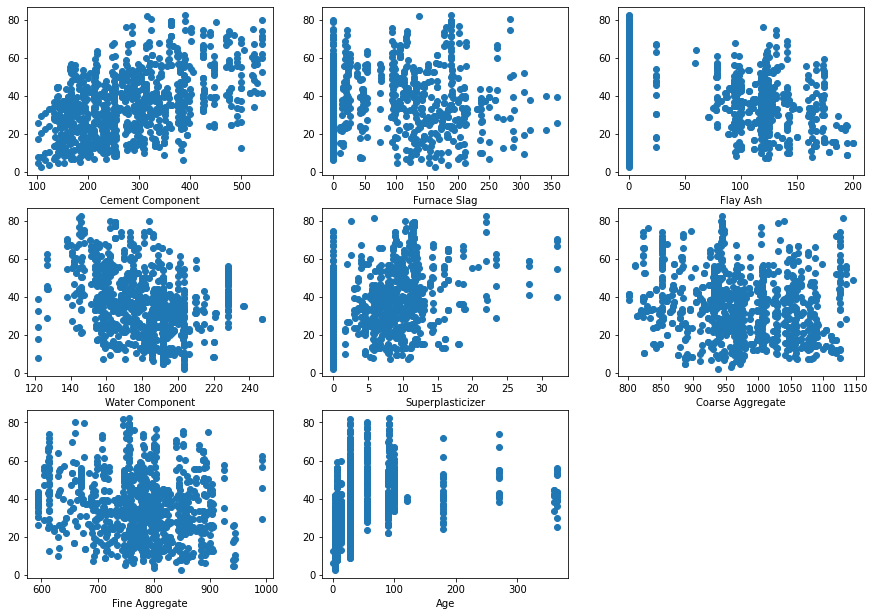

In [159]:
plt.figure(figsize=(15,10.5))
plot_count = 1

for feature in list(data.columns)[:-1]:
       plt.subplot(3,3,plot_count)
       plt.scatter(data[feature], data['concrete_strength'])
       plt.xlabel(feature.replace('_',' ').title())
       plot_count+=1
plt.show()

In [160]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = data.corr(method='pearson')
print(correlations)

                   cement_component  furnace_slag  ...    age  concrete_strength
cement_component              1.000        -0.275  ...  0.082              0.498
furnace_slag                 -0.275         1.000  ... -0.044              0.135
flay_ash                     -0.397        -0.324  ... -0.154             -0.106
water_component              -0.082         0.107  ...  0.278             -0.290
superplasticizer              0.092         0.043  ... -0.193              0.366
coarse_aggregate             -0.109        -0.284  ... -0.003             -0.165
fine_aggregate               -0.223        -0.282  ... -0.156             -0.167
age                           0.082        -0.044  ...  1.000              0.329
concrete_strength             0.498         0.135  ...  0.329              1.000

[9 rows x 9 columns]


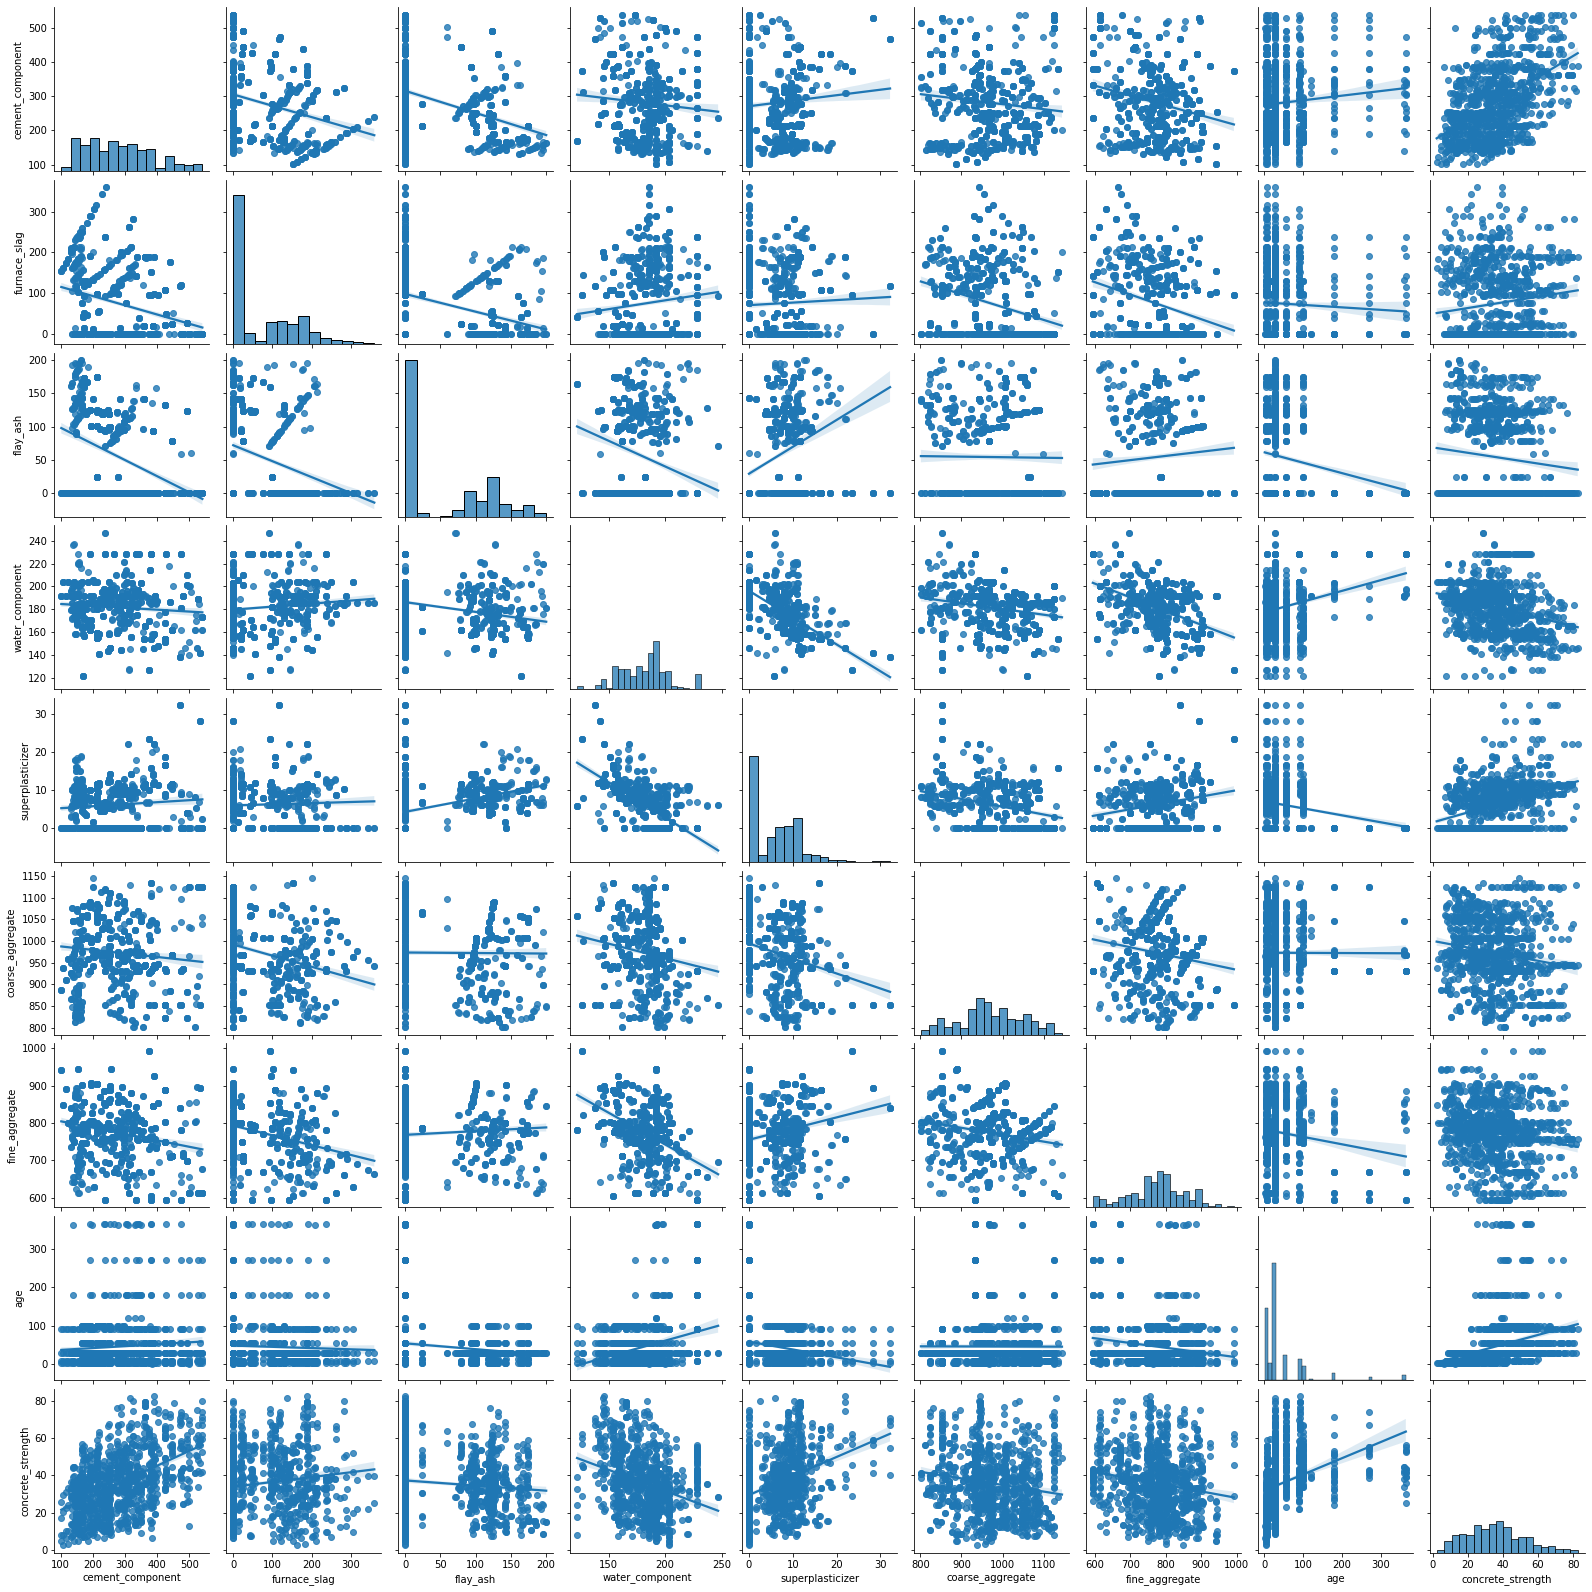

In [161]:
data_ = data[(data.T != 0).any()]
sns.pairplot(data_, vars=data.columns, kind='reg')
plt.show()

In [162]:
def train_test_split(data, feature, train_index=0.7):
   train, test = train_test_split(data, test_size = 1-train_index)

   if type(feature) == list:
       x_train = train[feature].as_matrix()
       y_train = train['concrete_strength'].as_matrix()

       x_test = test[feature].as_matrix()

       y_test = test['concrete_strength'].as_matrix()
   else:
      x_train = [[x] for x in list(train[feature])]
      y_train = [[x] for x in list(train['concrete_strength'])]
      x_test = [[x] for x in list(test[feature])]
      y_test = [[x] for x in list(test['concrete_strength'])]
   return x_train, y_train, x_test, y_test

  

In [168]:
plt.figure(figsize=(15,7))
plot_count = 1

for feature in ['cement_component', 'flay_ash', 'water_component', 
'superplasticizer', 'coarse_aggregate']:
    data_tr = data[['concrete_strength', feature]]
    data_tr=data_tr[(data_tr.T != 0).all()]



<Figure size 1080x504 with 0 Axes>

In [203]:
plt.show()